# EPA1361 - Model-Based Decision Making

## Multi-model analysis

This exercise uses a simple version of the [Lotka-Volterra predator-prey equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) to show how the EMA Workbench can be used for a
multi-model analysis, in addition to typical parametric/structural uncertainties. This will let you test the **connectors** provided in the Workbench for **Excel, NetLogo, and Vensim** / PySD; we'll also use the models for the sensitivity analysis exercise in week 3.

**Assignment**
Using the <u> three model files </u> provided and the Python function below, define model objects for each implementation (Excel, NetLogo, Vensim/PySD, and Python), and test them using <u> a single ensemble </u>. Use 50 experiments sampled from the parameters below (so that each experiment will be executed for the 4 models, for a total of 200), and retrieve <u> outputs </u> for the _TIME_, _predators_, and _prey_ variables.
   * Excel and Vensim are only supported on Windows
   * Vensim requires the DSS version of Vensim
   * Netlogo supoprt depends on [jpype](http://jpype.readthedocs.io/en/latest/install.html) and [pynetlogo](https://pynetlogo.readthedocs.io/en/latest/). Also, if you don't have NetLogo installed, please get [NetLogo 6.3.0](https://ccl.northwestern.edu/netlogo/download.shtml)
   * for pysd, see [its documentation](http://pysd.readthedocs.io/en/master/installation.html)
   * If possible try to work with all model versions, but even 2 or 3 (pure python and something else should be sufficient).


|Parameter	|Range or value	        |
|-----------|--------------:|
|prey_birth_rate    	|0.015 – 0.035	|
|predation_rate|0.0005 – 0.003 	|
|predator_efficiency     	|0.001 – 0.004	    |
|predator_loss_rate	    |0.04 – 0.08	    |
|Final time	    |365	    |
|dt	    |0.25	    |

* Note that your EMA Workbench installation includes [example scripts](https://github.com/quaquel/EMAworkbench/tree/master/ema_workbench/examples) for the different connectors. The different model objects follow a similar syntax but will need to be slightly adjusted depending on the software (e.g. to specify the NetLogo run length or the sheet name in Excel).
  * This [tutorial](https://emaworkbench.readthedocs.io/en/latest/basic_tutorial.html) also shows a simple model in Python, Vensim and Excel connected to the workbench.

* These model objects can be used with a replication functionality (for instance to test the effect of stochastic uncertainty in a NetLogo model), which repeats a given experiment over multiple replications. You can use a single replication in this exercise as the models are not stochastic. By default, each outcome array will then have a shape of (# experiments, # replications, # time steps). Try adapting the outcome arrays so that they can be used with the _lines_ plotting function of the Workbench, and plot the results grouped by model.

* To check the graphical results, find the maximum absolute error of the time series you obtained for the _prey_ variable in the Excel, NetLogo, and Vensim/PySD models, relative to the Python function.

In [3]:

# Some imports you may need
import numpy as np
import matplotlib.pyplot as plt

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome, perform_experiments, ema_logging)

from ema_workbench.connectors.netlogo import NetLogoModel
from ema_workbench.connectors.excel import ExcelModel
from ema_workbench.connectors.pysd_connector import PysdModel

from ema_workbench.em_framework.samplers import LHSSampler
from ema_workbench.em_framework.salib_samplers import MorrisSampler, SobolSampler

from ema_workbench.analysis.plotting import lines, Density


c:\Users\Move\anaconda3\envs\abm24\Lib\site-packages\ema_workbench\connectors\__init__.py:19: ImportWarning: vensim connector not available
  warnings.warn("vensim connector not available", ImportWarning)
c:\Users\Move\anaconda3\envs\abm24\Lib\site-packages\ema_workbench\connectors\__init__.py:34: ImportWarning: simio connector not available
  warnings.warn("simio connector not available", ImportWarning)
c:\Users\Move\anaconda3\envs\abm24\Lib\site-packages\ema_workbench\analysis\prim.py:32: ImportWarning: altair based interactive inspection not available
  warnings.warn("altair based interactive inspection not available", ImportWarning)


In [ ]:
'''
# Import the Python function
from model.pred_prey import PredPrey
'''

In [3]:
'''
# Define uncertainties and outcomes

# Define model objects for the different implementations

'''

'\n# Define uncertainties and outcomes\n\n# Define model objects for the different implementations\n\n'

<span style="color:red">

#### 3.1 Connect with Python model

</span>

In [1]:
# import the model function
from model.pred_prey import PredPrey

# import libraries and ema_workbench
import numpy as np
import matplotlib.pyplot as plt
from ema_workbench import Model, RealParameter, TimeSeriesOutcome, perform_experiments, ema_logging
from ema_workbench import SequentialEvaluator

# Instantiate the model: Python
model = Model('PredPrey', function=PredPrey)

# Specify uncertainties
model.uncertainties = [
    RealParameter('prey_birth_rate', 0.015, 0.035),
    RealParameter('predation_rate', 0.0005, 0.003),
    RealParameter('predator_efficiency', 0.001, 0.004),
    RealParameter('predator_loss_rate', 0.04, 0.08)
    ]

# Set levers

# Specify outcomes
model.outcomes = [TimeSeriesOutcome('TIME'),
                  TimeSeriesOutcome('predators'),
                  TimeSeriesOutcome('prey')
                  ]

# Perform experiments
ema_logging.log_to_stderr(ema_logging.INFO)

with SequentialEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=50)

[MainProcess/INFO] performing 50 scenarios * 1 policies * 1 model(s) = 50 experiments
100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 253.77it/s]
[MainProcess/INFO] experiments finished


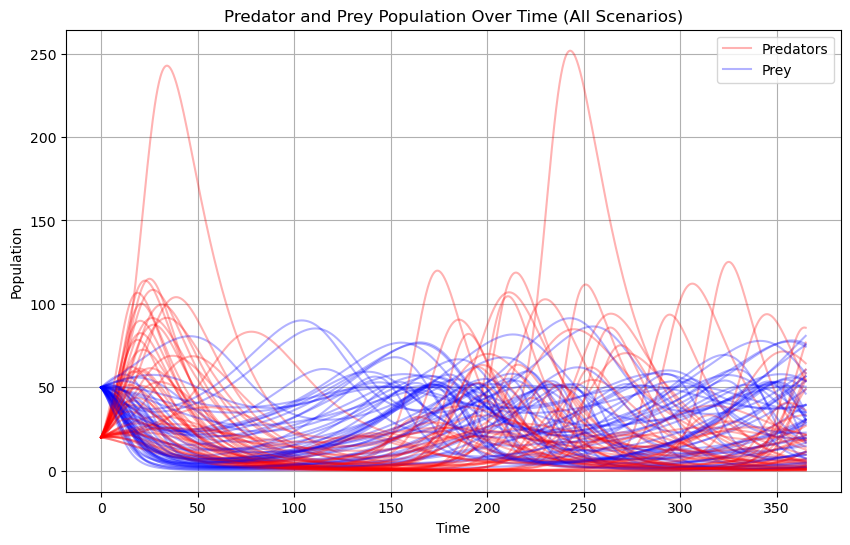

In [2]:
plt.figure(figsize=(10, 6))

for i in range(outcomes['TIME'].shape[0]):
    time = outcomes['TIME'][i, 0, :]
    predators = outcomes['predators'][i, 0, :]
    prey = outcomes['prey'][i, 0, :]
    
    plt.plot(time, predators, color='red', alpha=0.3, label='Predators' if i == 0 else "")
    plt.plot(time, prey, color='blue', alpha=0.3, label='Prey' if i == 0 else "")

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator and Prey Population Over Time (All Scenarios)')
plt.legend()
plt.grid()
plt.show()

<span style="color:red">

#### 3.2 Connect with Excel model

</span>

In [1]:
import pandas as pd

# Define the path to the Excel file
file_path = "model/PredPrey.xlsx"

# Load the Excel file into a pandas DataFrame
excel_data = pd.read_excel(file_path)

# Display the first few rows of the data
print(excel_data.head())

  Lotka-Volterra predator-prey model  Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0                                NaN         NaN         NaN         NaN   
1                Prey birth rate (α)      0.0250         NaN         NaN   
2                 Predation rate (β)      0.0015         NaN         NaN   
3            Predator efficiency (δ)      0.0020         NaN         NaN   
4             Predator loss rate (γ)      0.0600         NaN         NaN   

   Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   ...  Unnamed: 1452  Unnamed: 1453  Unnamed: 1454  Unnamed: 1455  \
0  ...    

In [ ]:
# import the model function
wd = "model"
model_file = "PredPrey.xlsx"

# import libraries and ema_workbench
import numpy as np
import matplotlib.pyplot as plt
from ema_workbench import Model, RealParameter,TimeSeriesOutcome, perform_experiments, ema_logging
from ema_workbench import MultiprocessingEvaluator
from ema_workbench.connectors.excel import ExcelModel

# Instantiate the model: Python
model = ExcelModel("PredPrey", wd=wd, model_file=model_file)
# name of the sheet
model.default_sheet = "Sheet1"

# Specify uncertainties
model.uncertainties = [
    RealParameter('prey_birth_rate', 0.015, 0.035),
    RealParameter('predation_rate', 0.0005, 0.003),
    RealParameter('predator_efficiency', 0.001, 0.004),
    RealParameter('predator_loss_rate', 0.04, 0.08)
    ]

# Set levers

# Specify outcomes
model.outcomes = [TimeSeriesOutcome('TIME'),
                  TimeSeriesOutcome('predators'),
                  TimeSeriesOutcome('prey')
                  ]

# Perform experiments
ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model) as evaluator:
    results = perform_experiments(model, 50, reporting_interval=1, evaluator=evaluator)

c:\Users\Move\anaconda3\envs\abm24\Lib\site-packages\ema_workbench\connectors\__init__.py:19: ImportWarning: vensim connector not available
  warnings.warn("vensim connector not available", ImportWarning)
c:\Users\Move\anaconda3\envs\abm24\Lib\site-packages\ema_workbench\connectors\__init__.py:34: ImportWarning: simio connector not available
  warnings.warn("simio connector not available", ImportWarning)
[MainProcess/INFO] pool started with 16 workers
[MainProcess/INFO] performing 50 scenarios * 1 policies * 1 model(s) = 50 experiments
  0%|                                                   | 0/50 [00:00<?, ?it/s]

<span style="color:red">

#### 3.3 Connect with Vensim model

ImportError: vensim dll not found

According to [this post](https://www.ventanasystems.co.uk/forum/viewtopic.php?t=7522), The dll is only provided with Vensim dss.

</span>

In [ ]:
'''
# import the model function
wd = "model/"
model_file = "PredPrey.mdl"

# import libraries and ema_workbench
import numpy as np
import matplotlib.pyplot as plt
from ema_workbench import Model, RealParameter, TimeSeriesOutcome, perform_experiments, ema_logging
from ema_workbench import MultiprocessingEvaluator
from ema_workbench.connectors.vensim import VensimModel

# Instantiate the model: Python
model = VensimModel("PredPrey", wd=wd, model_file=model_file)

# Specify uncertainties
model.uncertainties = [
    RealParameter('prey birth rate', 0.015, 0.035),
    RealParameter('predation rate', 0.0005, 0.003),
    RealParameter('predator efficiency', 0.001, 0.004),
    RealParameter('Predator loss rate', 0.04, 0.08)
    ]

# Set levers

# Specify outcomes
model.outcomes = [TimeSeriesOutcome('t'),
                  TimeSeriesOutcome('predators'),
                  TimeSeriesOutcome('prey')
                  ]

# Perform experiments
ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model) as evaluator:
    results = perform_experiments(model, 50, reporting_interval=1, evaluator=evaluator)
'''

ImportError: vensim dll not found

<span style="color:red">

#### 3.4 Connect with NetLogo model

</span>

In [ ]:
# import the model function
wd = "model/"
model_file = "PredPrey.nlogo"

# import libraries and ema_workbench
import numpy as np
import matplotlib.pyplot as plt
from ema_workbench import Model, RealParameter, TimeSeriesOutcome, perform_experiments, ema_logging
from ema_workbench import MultiprocessingEvaluator
from ema_workbench.connectors.netlogo import NetLogoModel

# Instantiate the model: Python
model = NetLogoModel("PredPrey", wd=wd, model_file=model_file)
model.run_length = 100
model.replications = 10

# Specify uncertainties
model.uncertainties = [
    RealParameter('prey_birth_rate', 0.015, 0.035),
    RealParameter('predation_rate', 0.0005, 0.003),
    RealParameter('predator_efficiency', 0.001, 0.004),
    RealParameter('Predator_loss_rate', 0.04, 0.08)
    ]

# Set levers

# Specify outcomes
model.outcomes = [TimeSeriesOutcome('TIME'),
                  TimeSeriesOutcome('predators'),
                  TimeSeriesOutcome('prey')
                  ]

# Perform experiments
ema_logging.log_to_stderr(ema_logging.INFO)

n = 10

with MultiprocessingEvaluator(model, n_processes=-1, maxtasksperchild=4) as evaluator:
    results = evaluator.perform_experiments(n)


c:\Users\Move\anaconda3\envs\abm24\Lib\site-packages\ema_workbench\connectors\__init__.py:19: ImportWarning: vensim connector not available
  warnings.warn("vensim connector not available", ImportWarning)
c:\Users\Move\anaconda3\envs\abm24\Lib\site-packages\ema_workbench\connectors\__init__.py:34: ImportWarning: simio connector not available
  warnings.warn("simio connector not available", ImportWarning)
[MainProcess/INFO] pool started with 15 workers
[MainProcess/INFO] performing 10 scenarios * 1 policies * 1 model(s) = 10 experiments
  0%|                                                   | 0/10 [00:00<?, ?it/s]

<span style="color:red">

# Questions

1. How to set the seed for each connector?
2. Problems with non-python connectors

</span>